<h1> Quiz 1 : Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa kalian masing2?

1. Apa perbedaan antara data latih, data validasi, dan data test?
2. Bagaimana cara kita menilai performa suatu model?
3. Apa itu Confusion Matriks? Jelaskan secara lengkap!
4. Apa itu Classification Report dari sklearn?

1. Data latih adalah sekumpulan data yang digunakan untuk dipelajari dengan diberikan input dan output yang diharapkan, sedangkan data validasi adalah sekumpulan data yang digunakan untuk mengevaluasi data training apakah sudah akurat atau belum, jika belum maka akan dilakukan training kembali, sementara data test adalah sekumpulan data yang ditujukan untuk mengetahui apakah suatu model lolos atau tidak dengan catatan tidak menggunakan data training melainkan data yang baru.

2. Dengan menggunakan metode cross validation yang di dalamnya terdapat validation fold dan training fold untuk menilai suatu performa suatu model.

3. Confusion matriks adalah suatu matriks yang lebih detail dalam menilai suatu model yang didalamnya terdapat predictive values dan actual values. Kedua values tersebut dijadikan 4 tebakan dibanding akurasi yang hanya 2 tebakan benar atau salah yaitu:
- Tebakan Benar : Kenyataan Benar, Positif (True Positif)
- Tebakan Salah : Kenyataan Benar, Negatif (False Negatif)
- Tebakan Benar : Kenyataan Salah, Negatif (False Positif)
- Tebakan Salah : Kenyataan Salah, Positif (True Negatif)

4. Suatu function yang digunakan untuk membuat laporan teks yang menunjukkan matriks klasifikasi utama.

<h1>Quiz 2 : Applikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payu dara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut : https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien. dengan ketentuan sebagai berikut :

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
3. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?
4. Prediksi data test dengan model yang telah kalian buat!
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [0]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

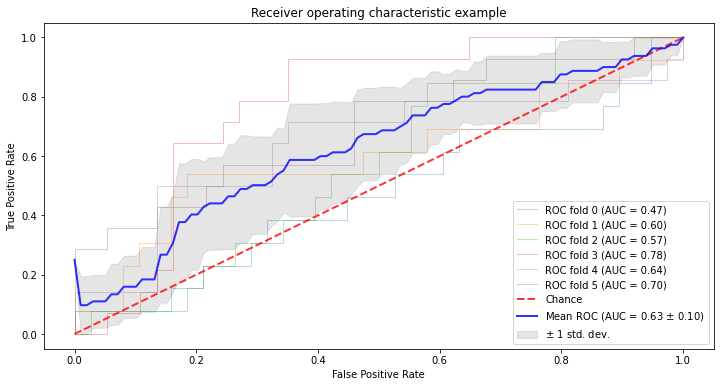

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

X = df.drop('survival_status', axis=1)
y = df['survival_status']
n_samples, n_features = X.shape

random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(12,6))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test], name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.25
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score

cv_result = cross_val_score(classifier, X, y, cv=10)
cv_result.mean()

0.6704301075268817

In [0]:
# No 4
y_pred = classifier.predict(X[test])
y_pred

array([2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2])

In [0]:
# No 5
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y[test], y_pred, labels=[2, 1])

array([[ 6,  8],
       [ 5, 32]])

In [0]:
TP = 6
FP = 5
FN = 8
TN = 32

In [0]:
# No 6
print(classification_report(y[test], y_pred))

              precision    recall  f1-score   support

           1       0.80      0.86      0.83        37
           2       0.55      0.43      0.48        14

    accuracy                           0.75        51
   macro avg       0.67      0.65      0.66        51
weighted avg       0.73      0.75      0.73        51



In [0]:
# No 7
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1score = 2 * precision * recall / (precision + recall)
print(precision)
print(recall)
print(f1score)

0.5454545454545454
0.42857142857142855
0.4799999999999999


In [0]:
# No 8
precision2 = TN/(TN+FN)
recall2 = TN/(TN+FP)
f1score2 = (precision2 * recall2 * 2) / (precision2 + recall2)
print(precision2)
print(recall2)
print(f1score2)

0.8
0.8648648648648649
0.8311688311688312
